Bagging = Birden fazla karar agacinin urettigi tahminleri bir araya getirilerek degerlendirilmesine dayanir

agac olusturmadi veri setinin 2/3 u kullanilir.Disarida kalan veri agaclarin performans degerlendirmesi ve degisken oneminin belirlenmesi icin kullanilir

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
df = pd.read_csv('Hitters.csv')
df = df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']]) #kategorik degiskenleri dummy degiskenlere donusturduk
y=df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')# bu 4 sutun kaldirir kalan sutunlari da float64 veri turune cevirir
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Model & Tahmin

In [13]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [15]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

344.8719613101134

In [22]:
rf_params = {"max_depth" : [5,8,10],
             "max_features": [2,5,10],
             "n_estimators": [200,500,1000,2000],
            "min_samples_split":[2,10,80,100]}

In [24]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators

In [27]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [29]:
rf_model = RandomForestRegressor(random_state= 42,
                                 max_depth=8,
                                 max_features=2,
                                 min_samples_split=2,
                                 n_estimators=200)
rf_tuned = rf_model.fit(X_train,y_train)

In [31]:
rf_tuned

RandomForestRegressor(max_depth=8, max_features=2, n_estimators=200,
                      random_state=42)

In [33]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

349.1649379391149

Degisken Önem Düzeyi

In [38]:
rf_tuned.feature_importances_ * 100

array([5.81548333, 6.38520787, 3.52630602, 4.18186433, 4.68121896,
       4.92291235, 7.38372335, 9.72940722, 8.68736867, 7.89130478,
       8.78157948, 8.30862336, 9.69431474, 4.71131944, 2.04114365,
       1.83878075, 0.38469815, 0.55485771, 0.47988582])

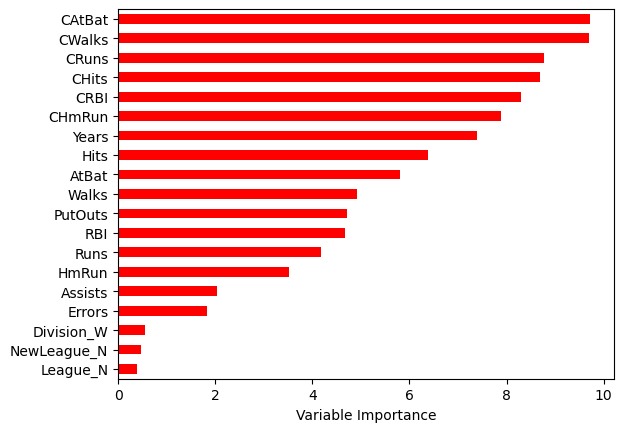

In [44]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_ * 100},
                         index=X_train.columns)

Importance.sort_values(by='Importance',
                       axis=0,
                       ascending=True).plot(kind='barh',
                                            color='r',)

plt.xlabel('Variable Importance')
plt.gca().legend_=None
                            

### Gradient Boosting Machines(GBM)

Seri icersiindeki bir model serideki bir onceki modelin tahmin artiklarinin/hatalarinin uzerine kurularak olusturulur

In [47]:
df = pd.read_csv('Hitters.csv')
df = df.dropna()
dms= pd.get_dummies(df[['League','Division','NewLeague']]) #kategorik degiskenleri dummy degiskenlere donusturduk
y=df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')# bu 4 sutun kaldirir kalan sutunlari da float64 veri turune cevirir
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [49]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [53]:
gbm_model

GradientBoostingRegressor()

In [55]:
y_pred = gbm_model.predict(X_test)

In [57]:
np.sqrt(mean_squared_error(y_test,y_pred))

359.5412986910344

In [67]:
gbm_params = {"learning_rate" : [0.001,0.1,0.01],
             "max_depth":[3,5,8],
             "n_estimators":[100,200,500,1000],
             "subsample":[1,0.5,0.8],
             "loss":["ls","lad","quantile"]}

In [69]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [71]:
gbm_cv_model = GridSearchCV(gbm_model
                            ,gbm_params
                            ,cv=10
                            ,n_jobs=-1
                            ,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] EN

In [72]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'quantile',
 'max_depth': 5,
 'n_estimators': 1000,
 'subsample': 0.5}

In [99]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1,
                                      loss="quantile",
                                      max_depth=5,
                                      n_estimators=1000,
                                      subsample=0.5).fit(X_train,y_train)

In [100]:
y_pred=gbm_tuned.predict(X_test)

In [101]:
np.sqrt(mean_squared_error(y_test,y_pred))

346.64044101712943

In [105]:
#degisken onem duzeyi

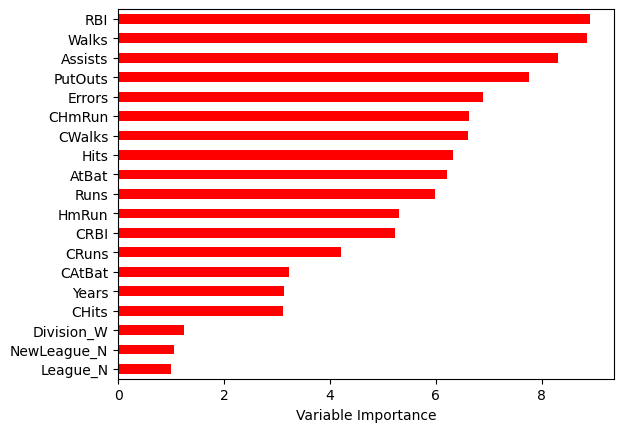

In [107]:
Importance = pd.DataFrame({'Importance': gbm_tuned.feature_importances_ * 100},
                         index=X_train.columns)

Importance.sort_values(by='Importance',
                       axis=0,
                       ascending=True).plot(kind='barh',
                                            color='r',)

plt.xlabel('Variable Importance')
plt.gca().legend_=None
                            